# Project 2.1: Modeling the Price of Vehicles
## Part 1: Cleaning and Wrangling Data with Automobile Dataset

For this dataset, we will try to build a model to determine the price of a vehicle. For this lab, we will complete the data cleaning and exploratory data analysis required to build our model. Cleaning the dataset and identifying features which relate to vehicle price is critical to building a model to answer our question. A future lab will use our findings here to actually create the model. This notebook contains part 1 of this lab and is worth 6 points.

**Rubric**

- 6 pts - Contains all required components and uses professional language
- 5 pts - Contains all required components, but uses unprofessional language, formating, etc.
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit


## Getting the data 
For this lab we are using the automobile dataset from [UC Irving's Machine Learning Repository](https://archive.ics.uci.edu/dataset/10/automobile). This dataset should be available in your GitHub repository as `automobile.csv`.

Import `pandas` and use `.read_csv()` to create your dataframe.

In [631]:
import pandas as pd

df = pd.read_csv("automobile.csv")

To make sure your dataframe is correct, list the columns of your dataframe.

In [632]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
196,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
197,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
198,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


## Data cleaning and wrangling
Looking at our dataset, we can see several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

So, how do we identify all those missing values and deal with them?

Steps for working with missing data:
1. Identify missing data
2. Deal with missing data
3. Correct data format

### Identify and handle missing values
#### Identify missing values
##### Convert "?" to NaN
In the car dataset, missing data comes with the question mark "?".
We replace "?" with numpy's NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: `.replace(A, B, inplace = True)` to replace A by B.


In [633]:
import numpy
df.replace("", numpy.NaN, inplace=True)

##### Evaluating for missing data

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:
- `.isnull()`
- `.notnull()`

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.
"True" means the value is a missing value while "False" means the value is not a missing value.

##### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method `.value_counts()` counts the number of "True" values. 


In [634]:
total = 0
for column in df.columns:
    print(df[column].isnull().value_counts(dropna=False))

#There are 50 total null values
    

symboling
False    200
Name: count, dtype: int64
normalized-losses
False    164
True      36
Name: count, dtype: int64
make
False    200
Name: count, dtype: int64
fuel-type
False    200
Name: count, dtype: int64
aspiration
False    200
Name: count, dtype: int64
num-of-doors
False    198
True       2
Name: count, dtype: int64
body-style
False    200
Name: count, dtype: int64
drive-wheels
False    200
Name: count, dtype: int64
engine-location
False    200
Name: count, dtype: int64
wheel-base
False    200
Name: count, dtype: int64
length
False    200
Name: count, dtype: int64
width
False    200
Name: count, dtype: int64
height
False    200
Name: count, dtype: int64
curb-weight
False    200
Name: count, dtype: int64
engine-type
False    200
Name: count, dtype: int64
num-of-cylinders
False    200
Name: count, dtype: int64
engine-size
False    200
Name: count, dtype: int64
fuel-system
False    200
Name: count, dtype: int64
bore
False    196
True       4
Name: count, dtype: int64
stroke
False

Based on the summary above, each column has 200 rows of data and six of the columns containing missing data:
- `normalized-losses`: 
- `num-of-doors`: 
- `bore`: 
- `stroke`: 
- `horsepower`:
- `peak-rpm`: 

#### Deal with missing data
How to deal with missing data?

1. Drop data
    1. Drop the whole row
    2. Drop the whole column
2. Replace data
    1. Replace it by mean
    2. Replace it by frequency
    3. Replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

1. Replace by mean:
- `normalized-losses`: 36 missing data
- `bore`: 4 missing data 
- `stroke`: 4 missing data 
- `horsepower`: 2 missing data 
- `peak-rpm`: 2 missing data

2. Replace by frequency:
- `num-of-doors`: 2 missing data - *84% sedans is four doors. Since four doors is most frequent, it is most likely to occur*

Calculate the mean value for the "normalized-losses" column

In [635]:
print(df["normalized-losses"].mean())
normLossMean = df["normalized-losses"].mean()
#The mean of the column is 122.0

122.0


Replace "NaN" with mean value in "normalized-losses" column. You can use `.replace()` for `.fillna()`.

In [636]:
df["normalized-losses"] = df["normalized-losses"].replace(numpy.NaN, normLossMean)

Calculate the mean value for the "bore" column. Then, replace "NaN" with the mean value in the "bore" column.

In [637]:
boreMean = df["bore"].mean()
df["bore"] = df["bore"].replace(numpy.NaN, boreMean)

Calculate the mean value for the "stroke" column. Replace NaN in "stroke" column with the mean value.

In [638]:
strokeMean = df["stroke"].mean()
df["stroke"] = df["stroke"].replace(numpy.NaN, strokeMean)

Calculate the mean value for the "horsepower" column. Replace "NaN" with the mean value in the "horsepower" column.


In [639]:
horsepowerMean = df["horsepower"].mean()
df["horsepower"] = df["horsepower"].replace(numpy.NaN, horsepowerMean)

Calculate the mean value for "peak-rpm" column. Replace "NaN" with the mean value in the "peak-rpm" column.

In [640]:
peakMean = df["peak-rpm"].mean()
df["peak-rpm"] = df["peak-rpm"].replace(numpy.NaN, peakMean)

For "num-of-doors", we want to replae it with the mode common value. To see which values are present in a particular column, we can use the `.value_counts()` function:

In [641]:
df["num-of-doors"].value_counts(dropna=False)

num-of-doors
four    113
two      85
NaN       2
Name: count, dtype: int64

We can see that four doors are the most common type. We can also use the `.idxmax()` function with `.value_counts()` to calculate the most common type automatically:


In [642]:
common = df["num-of-doors"].value_counts(dropna=False).idxmax()

Now replace the null values in "num-of-doors" with the most common value.  

In [643]:
df["num-of-doors"].replace(numpy.NaN, "four")
df["num-of-doors"].value_counts(dropna=False)

num-of-doors
four    113
two      85
NaN       2
Name: count, dtype: int64

**Great!** Now, we have a dataset with no missing values.

### Correct data format
We are almost there! The last step is checking and making sure that all data is in the correct format (int, float, text or other).
In pandas, we use:
- `.dtype()` to check the data type
- `.astype()` to change the data type

Let's list the data types for each column. Verify that the data types make sense with the [documentation](https://archive.ics.uci.edu/dataset/10/automobile). If not, change the data types.

In [644]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


### Data Standardization

Data is usually collected from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)

**What is standardization?**
Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.>We will need to apply data transformation to transform mpg into L/100km. 

The formula for unit conversion is: L/100km = 235 / mpg.

Use pandas to create the column `city-L/100km` and `highway-L/100km`.

In [645]:
newColumn = []
newColumn2 = []
for i in range(len(df["city-mpg"])):
    newColumn.append(df["city-mpg"][i] / 2.35)
df["city-L/100km"] = newColumn
for i in range(len(df["highway-mpg"])):
    newColumn2.append(df["highway-mpg"][i] / 2.35)
df["highway-L/100km"] = newColumn2
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
highway-L/100km      float64
dtype: object

### Data Normalization

**Why normalization?**
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0 and the variance is 1, or scaling the variable so the variable values range from 0 to 1.

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".
- Target:normalize those variables so their value ranges from 0 to 1
- Approach: replace original value by (original value)/(maximum value)

Normalize the columns "length", "width", and "height". Use the `.max()` function to get the column max. Print the first 10 values of "length", "width", and "height".

In [646]:

for i in range(len(df["length"])):
    df["length"][i] /= df["length"].max()
    df["width"][i] /= df["width"].max()
    df["height"][i] /= df["height"].max()

df["length"].head(10)
df["width"].head(10)
df["height"].head(10)

/tmp/ipykernel_29428/1049891725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["length"][i] /= df["length"].max()
/tmp/ipykernel_29428/1049891725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["width"][i] /= df["width"].max()
/tmp/ipykernel_29428/1049891725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["height"][i] /= df["height"].max()
/tmp/ipykernel_29428/1049891725.py:2: SettingWithCopyWarning: 
A value is t

0    0.816054
1    0.876254
2    0.908027
3    0.908027
4    0.887960
5    0.931438
6    0.931438
7    0.934783
8    0.908027
9    0.908027
Name: height, dtype: float64

Here we can see we've normalized "length", "width" and "height" in the range of \[0,1].


### Binning

**Why binning?**
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? 

We will use the pandas method `cut()` to segment the 'horsepower' column into 3 bins.

#### Binning data with pandas 

Since we want to create bins based on numerical values of "horsepower", we need to make sure that the coulmn is of type integer. If it is not, fix it now.

In [647]:
df["horsepower"] = df["horsepower"].astype(int)
df["horsepower"].dtypes

dtype('int64')

Let's plot the histogram of "horsepower" to see what the distribution of the values look like.

Import `matplotlib.pyplot` and use `hist(df['horsepower'])` to create a histogram. Make sure your graph has a title and  x and y axis labels.

Text(0.5, 1.0, 'Frequencies of Horsepowers Among Automobiles')

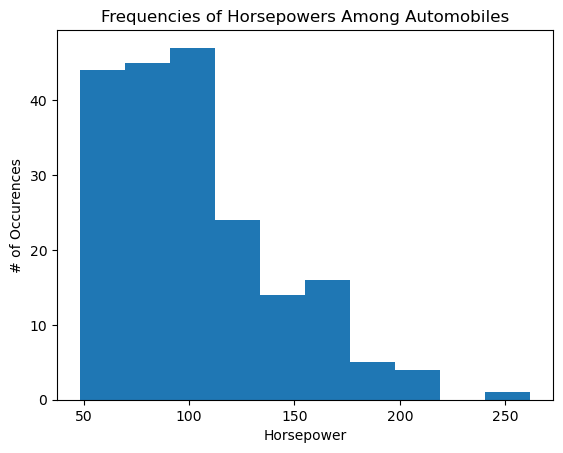

In [648]:
import matplotlib.pyplot as plt

plt.hist(df["horsepower"])
plt.xlabel("Horsepower")
plt.ylabel("# of Occurences")
plt.title("Frequencies of Horsepowers Among Automobiles")

We would like 3 bins of equal size, so we use numpy's `linspace(start_value, end_value, numbers_generated)` function.
- Since we want to include the minimum value of horsepower, we want to set `start_value = min(df["horsepower"])`.
- Since we want to include the maximum value of horsepower, we want to set `end_value = max(df["horsepower"])`.
- Since we are building 3 bins of equal length, there should be 4 dividers, so `numbers_generated = 4`.

Create an array called `binns` using `linspace()`. These values will determine when one bin ends and another begins when applied to "horsepower".

In [649]:
bins = numpy.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

Create a list of group names that we will set for each label. The three groups we want are low, meidum, and high.

In [650]:
group_names = ["low", "medium", "high"]

Create a new column called "horsepower-binned" using the `cut()` function with `pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)`. Print out the first 20 rows of "horsepower" and "horsepower-binned" to check your work. 

In [651]:
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)
df["horsepower"].head(20)
df["horsepower-binned"].head(20)

0        low
1     medium
2        low
3        low
4        low
5        low
6        low
7     medium
8        low
9        low
10    medium
11    medium
12    medium
13    medium
14    medium
15    medium
16       low
17       low
18       low
19       low
Name: horsepower-binned, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

Check the number of vehicles in each bin using `value_counts()`.

In [652]:
df["horsepower-binned"].value_counts()

horsepower-binned
low       152
medium     43
high        5
Name: count, dtype: int64

Now, use let's make a histogram of our horsepower bins. The easiest way to do this is to use the `bar()` function like `bar(group_names, df["horsepower-binned"].value_counts())`. Make sure your graph has axis labels and a title.

Text(0, 0.5, '# of Occurences')

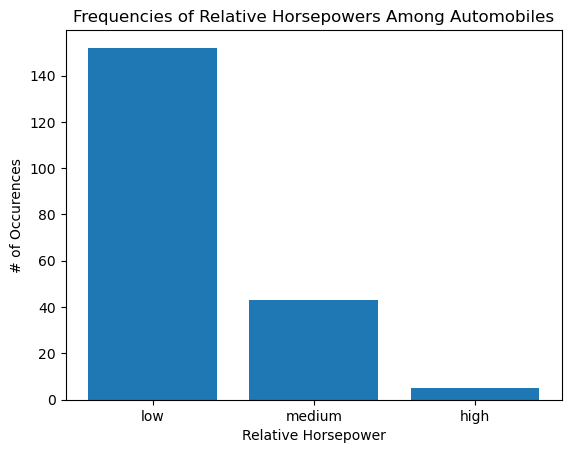

In [653]:
plt.bar(group_names, df["horsepower-binned"].value_counts())
plt.title("Frequencies of Relative Horsepowers Among Automobiles")
plt.xlabel("Relative Horsepower")
plt.ylabel("# of Occurences")

Look at the graph above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High"). We successfully narrowed down the intervals from 59 to 3! Instead of making an entirely new column, you could have also made a quick visualization of these same bins by changing parameters in the `.hist()` method like `plt.hist(df["horsepower"], bins=3)`. 

### Indicator variables (or dummy variables)
**What is an indicator variable?**
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 

**Why we use indicator variables?**
We use indicator variables so we can use categorical variables for regression analysis in the later modules.

We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

Use pandas' method `get_dummies(column_name)` to assign numerical values to different categories of fuel type and assign it to a variable.


In [654]:
df2 = pd.get_dummies(df["fuel-type"])

Change the column names to "fuel-type-gas" and "fuel-type-diesel" for clarity.


In [655]:
df2.rename(columns={"diesel": "fuel-type-diesel", "gas": "fuel-type-gas"}, inplace=True)
df2

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
195,False,True
196,False,True
197,False,True
198,True,False


Add the "dummy_variable" dataframe to your original dataframe `df` with pandas' `concat()` function. Then remove "fuel-type" from your dataframe.
```
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop('fuel-type', axis = 1, inplace = True)
```

In [656]:
df = pd.concat([df, df2], axis=1)
df.drop("fuel-type", axis=1, inplace=True)
df["fuel-type-diesel"].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: fuel-type-diesel, dtype: bool

The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


Similar to before, we follow the same steps to create indicator variables for the column "aspiration". Then use `concat()` to add your dummy variables back into the dataframe and remove the original column.

In [657]:
df3 = pd.get_dummies(df["aspiration"])
df = pd.concat([df, df3], axis=1)
df.drop("aspiration", axis=1, inplace=True)

**Awesome!** Now we are done cleaning our data.

## Export your file
To move to the second part of the lab, we need to save our dataframe in a new file. Use the function `df.to_csv(file_name)` to save your dataframe to a new csv.


In [658]:
df.to_csv("part1.csv")